<a href="https://colab.research.google.com/github/AbhiramSamapth/ML-Projects/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

Linear Regression Model:


In [4]:
class Linear_Regression():

  # initiating the parameters learning rate and no of iterations
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate= learning_rate
    self.no_of_iterations= no_of_iterations



  def fit(self,X,Y):
    # number of training examples(m) and the number of features(n)
    self.m,self.n = X.shape #number of rows=m,number of columns=n

    #initating the weight and the bias
    self.w = np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    # implementing the gradient descent

    for i in range(self.no_of_iterations):
      self.update_weigths()


  def update_weigths(self):
    Y_prediction = self.predict(self.X)

    # calculating gradients

    dw = -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m
    db = -2*np.sum(self.Y - Y_prediction)/self.m

    # upadating the wweights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  def predict(self,X):
    return X.dot(self.w) + self.b

***Work flow of the Linear Regression model:***

**Step 1**: Set Learning Rate & Number of Iterations; Initiate Random weight and bias value.

**Step 2**: Build Linear Regression Equation. (y = wx + b)

**Step 3**: Find the "y pred" value for given x value for the corresponding weight & bias.

**Step 4**: Check the loss function for these parameter values. ( difference between "y pred" & "true y")

**Step 5**: Update the parameter values using Gradient Descent. (new weight & bias value)

**Step 6**: Step 3, 4, 5 are repeated till we get minimum loss function
Finally we will get the best model (best weight and bias value) as it has minimum loss function.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Preprocessing

In [6]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [8]:
salary_data.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [9]:
salary_data.shape

(30, 2)

In [10]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=0.33)

Training the created Linear Regression model

In [15]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [16]:
model.fit(X_train,Y_train)

In [17]:
# printing the parameter values

print(model.w[0])
print(model.b)

9514.400999035135
23697.406507136307


In [18]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted vs Actual Values

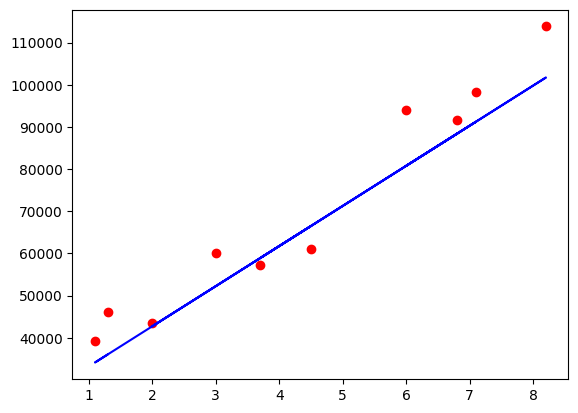

In [19]:
plt.scatter(X_test,Y_test,color='r')
plt.plot(X_test,test_data_prediction,color='blue')